# Prática 2

***Estatística para Ciência de Dados***

por **Cibele Russo**

**ICMC/USP - São Carlos SP**



## Visualização e Exploração de dados

### Exemplo: Dados de COVID-19 no estado de SP

Os dados em covid_cidades.csv referem-se aos registros de casos e mortes em **cidades** brasileiras no dia 29-12-2020. Desenvolva a visualização de dados de mortes registradas por **estado**, utilizando gráficos de setores, de barras e de Pareto. Analise a correlação entre casos e mortes registradas.

Fonte: Brasil.IO: boletins epidemiológicos da COVID-19 por município por dia, disponível em: [https://brasil.io/datasets/](https://brasil.io/datasets/). 

In [2]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

pkgdir = '/home/cibele/CibelePython/ECD/Data'


In [3]:
# COVID - Leitura dos dados
covid = pd.read_csv('covid_cidades.csv', index_col='date', parse_dates=True)

covid.head()

,state,city,confirmed,deaths,estimated_population_2019,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,
2020-12-29,AP,Amapá,956,6,9109.0,10406.00849,0.0063
2020-12-29,AP,Calçoene,1436,7,11117.0,12701.22059,0.0049
2020-12-29,AP,Cutias,741,2,5983.0,12145.54991,0.0027
2020-12-29,AP,Ferreira Gomes,930,5,7780.0,11673.15175,0.0054
2020-12-29,AP,Itaubal,345,0,5503.0,6142.06872,0.0000


In [4]:
len(covid)

5536

**Os dados são apresentados por cidades. Faça o agrupamento de dados por estados.**

In [8]:
# agrupando os dados por estado
somas = covid.groupby("state",as_index = False).sum() 
somas.head()

,state,confirmed,deaths,estimated_population_2019,confirmed_per_100k_inhabitants,death_rate
0,AC,41232,791,881935.0,1.011945e+05,0.3353
1,AL,104119,2475,3337357.0,2.508014e+05,3.6834
2,AM,198201,5232,4144597.0,4.021734e+05,0.9667
3,AP,67405,913,845731.0,1.740958e+05,0.1133
4,BA,487691,9072,14873064.0,1.150643e+06,6.6745


**Para uma melhor visualização dos gráficos, ordene a base de forma decrescente por mortes nos estados.**

In [26]:
somas=somas.sort_values('deaths',ascending=False)

In [6]:
somas = somas.sort_values(by='deaths', ascending=False)

**Represente os dados de mortes por estados com um gráfico de setores.**

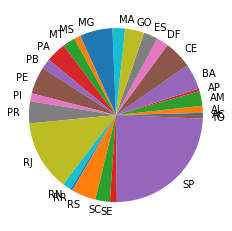

In [19]:
plt.pie(x=somas['deaths'],labels=somas['state'])
plt.show()

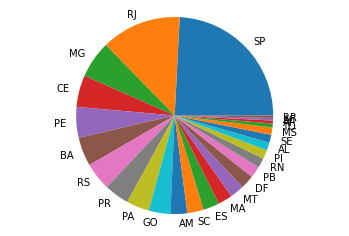

**Obtenha um gráfico de barras para as mortes por estados.**

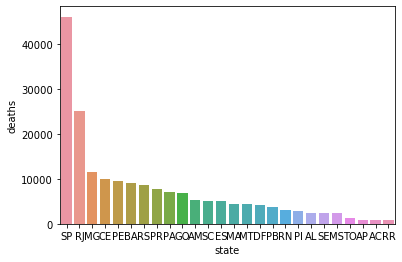

In [27]:
import seaborn as sns
sns.barplot(data=somas,x='state',y='deaths')

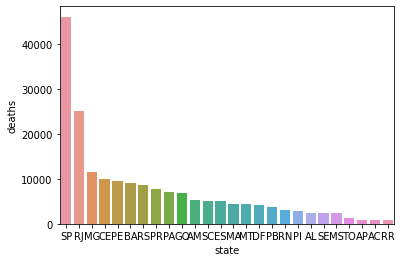

**Obtenha um gráfico de Pareto para as mortes por estados.**

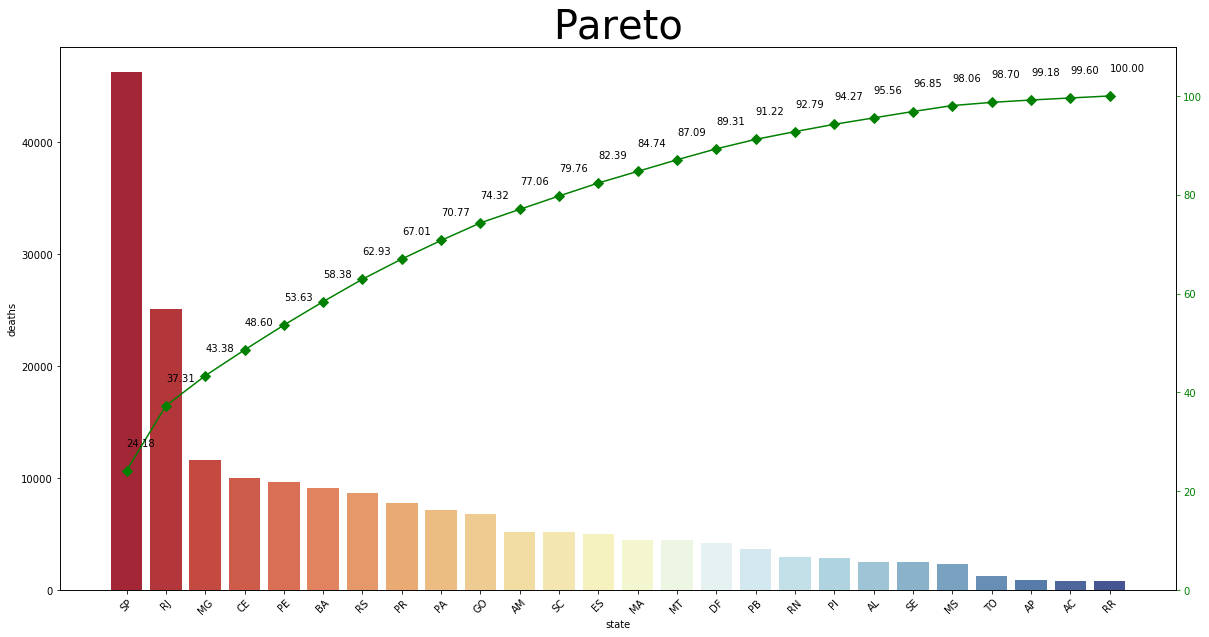

In [28]:
# Fonte: https://www.vstram.com.br/blog/grafico-pareto-python-six-sigma/

import seaborn as sns

# Cria a barplot, define os eixos e a paleta de cores usada para colorir as barras
plt.figure(figsize=(20,10))
ax = sns.barplot(x=somas["state"], y=somas["deaths"], palette="RdYlBu")
ax.set_title("Pareto", fontsize=40) # define e ajusta o tamanho da fonte do título

somas["Percent"] = somas["deaths"]/somas["deaths"].sum() * 100
somas['CumPercent'] = somas["Percent"].cumsum()

# Eixo secundário
ax2 = ax.twinx()

# Cria a Curva de Pareto no eixo secundário
ax2.plot(somas["state"], somas["CumPercent"], color="g", marker="D", ms=7, label='Pareto')

# Configurações dos eixos 
ax2.tick_params(axis="y", colors="g")
ax2.set_ylim([0,110])

# Ajusta a inclinação dos labels do eixo x
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# Mostra os labels com a percentagem acumulada em cada ponto
gap = 5
for i in range(len(somas["CumPercent"])):
    ax2.annotate("%.2f" % somas["CumPercent"][i], (somas["state"][i], somas["CumPercent"][i] + gap))


**Calcule o coeficiente de correlação de Pearson para casos confirmados e mortes. Classifique essa correlação como forte, moderada ou fraca.**

(0.918209816726233, 3.8768452766251617e-11)